In [4]:
import h5py
import numpy as np
from numpy import linalg
with h5py.File('../Input/images_training.h5','r') as H:
    data = np.copy(H['data'])
    X_train = data.reshape(len(data), -1)
with h5py.File('../Input/labels_training.h5','r') as H:
    label = np.copy(H['label'])
    y_train =label.reshape(len(label), -1)

### Draw the loss diagram to determine a good n_components for PCA

In [2]:
cov = np.cov(X_train.T)
cov.shape

(784, 784)

In [5]:
U, S, VT = linalg.svd(cov)

In [8]:
import matplotlib.pyplot as plt

4450829.784286855

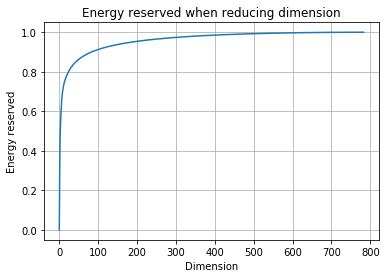

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([i for i in range(len(S))], [np.sum(S[:i])/np.sum(S) for i in range(len(S))])
plt.grid()
plt.title('Energy reserved when reducing dimension')
plt.xlabel('Dimension')
plt.ylabel('Energy reserved')
plt.show()

In [22]:
x = []
for i in range(784):
    if np.sum(S[:i])/np.sum(S) > 0.9:#energy reserved takes 90%
        x.append(i)
print(x[0])

83


In [23]:
x = []
for i in range(784):
    if np.sum(S[:i])/np.sum(S) > 0.95:#energy reserved takes 95%
        x.append(i)
print(x[0])

186


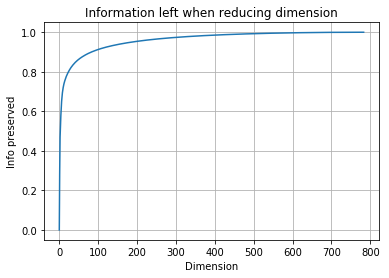

In [6]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(X_train[1]))], [np.sum(S[:i])/np.sum(S[:]) for i in range(len(X_train[1]))])
plt.grid()
plt.title('Information left when reducing dimension')
plt.xlabel('Dimension')
plt.ylabel('Info reserved')
plt.show()